In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


In [ ]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})
# Replacing unavailable data with a missing value that pandas is able to understand

<Axes: xlabel='survived', ylabel='fare'>

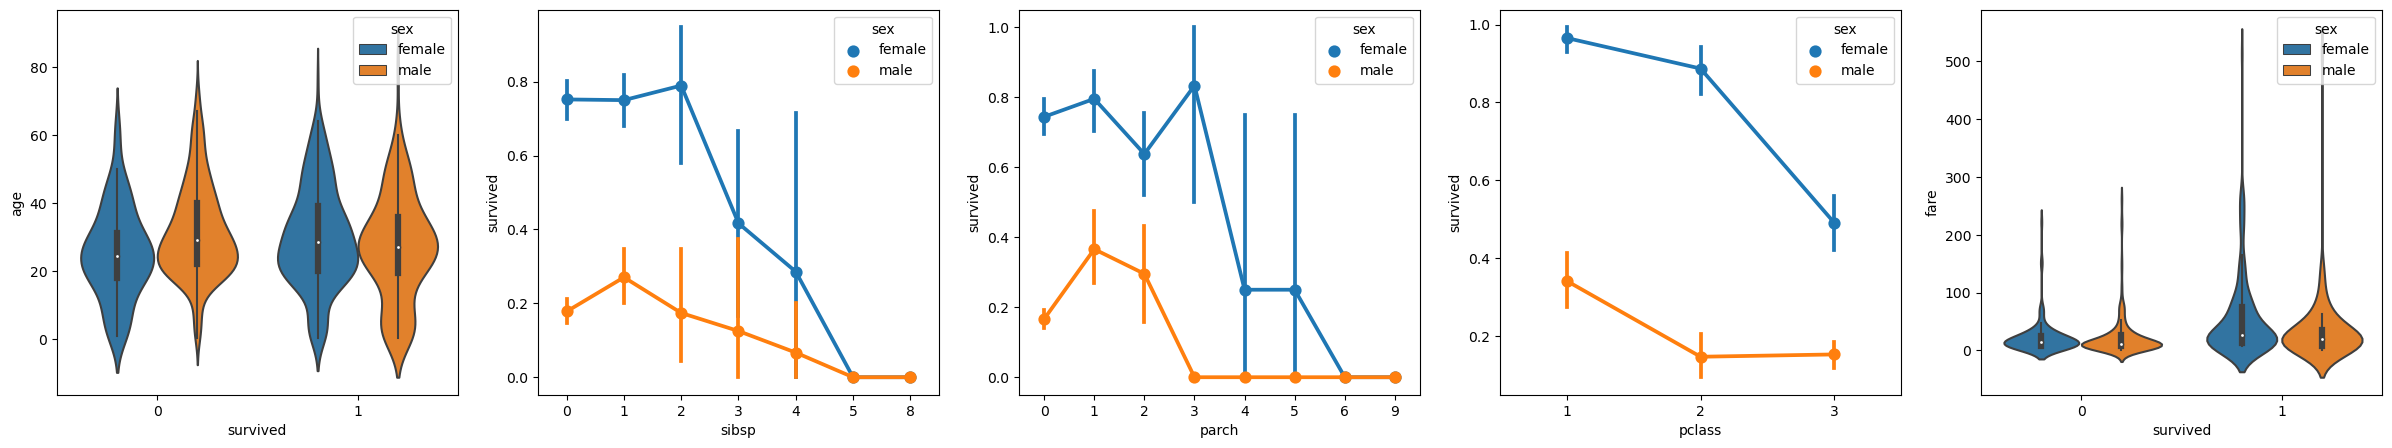

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
# Generating plots to see how certain columns of the dataset relate to survivability

In [ ]:
data.replace({'male': 1, 'female': 0}, inplace=True)
# Converting string values to integers for the correlation calculation

In [3]:
data.corr().abs()[["survived"]]
# Correlating the relationship between all variables and survival

C:\Users\isabe\AppData\Local\Temp\ipykernel_14160\143381672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [4]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]
# Relating two similar variables to see if combined they have a higher correlation to survivability

C:\Users\isabe\AppData\Local\Temp\ipykernel_14160\3242586923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [5]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()
# Dropping from the dataset the low values that most likely do not have any correlation

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)
# Splitting up the data